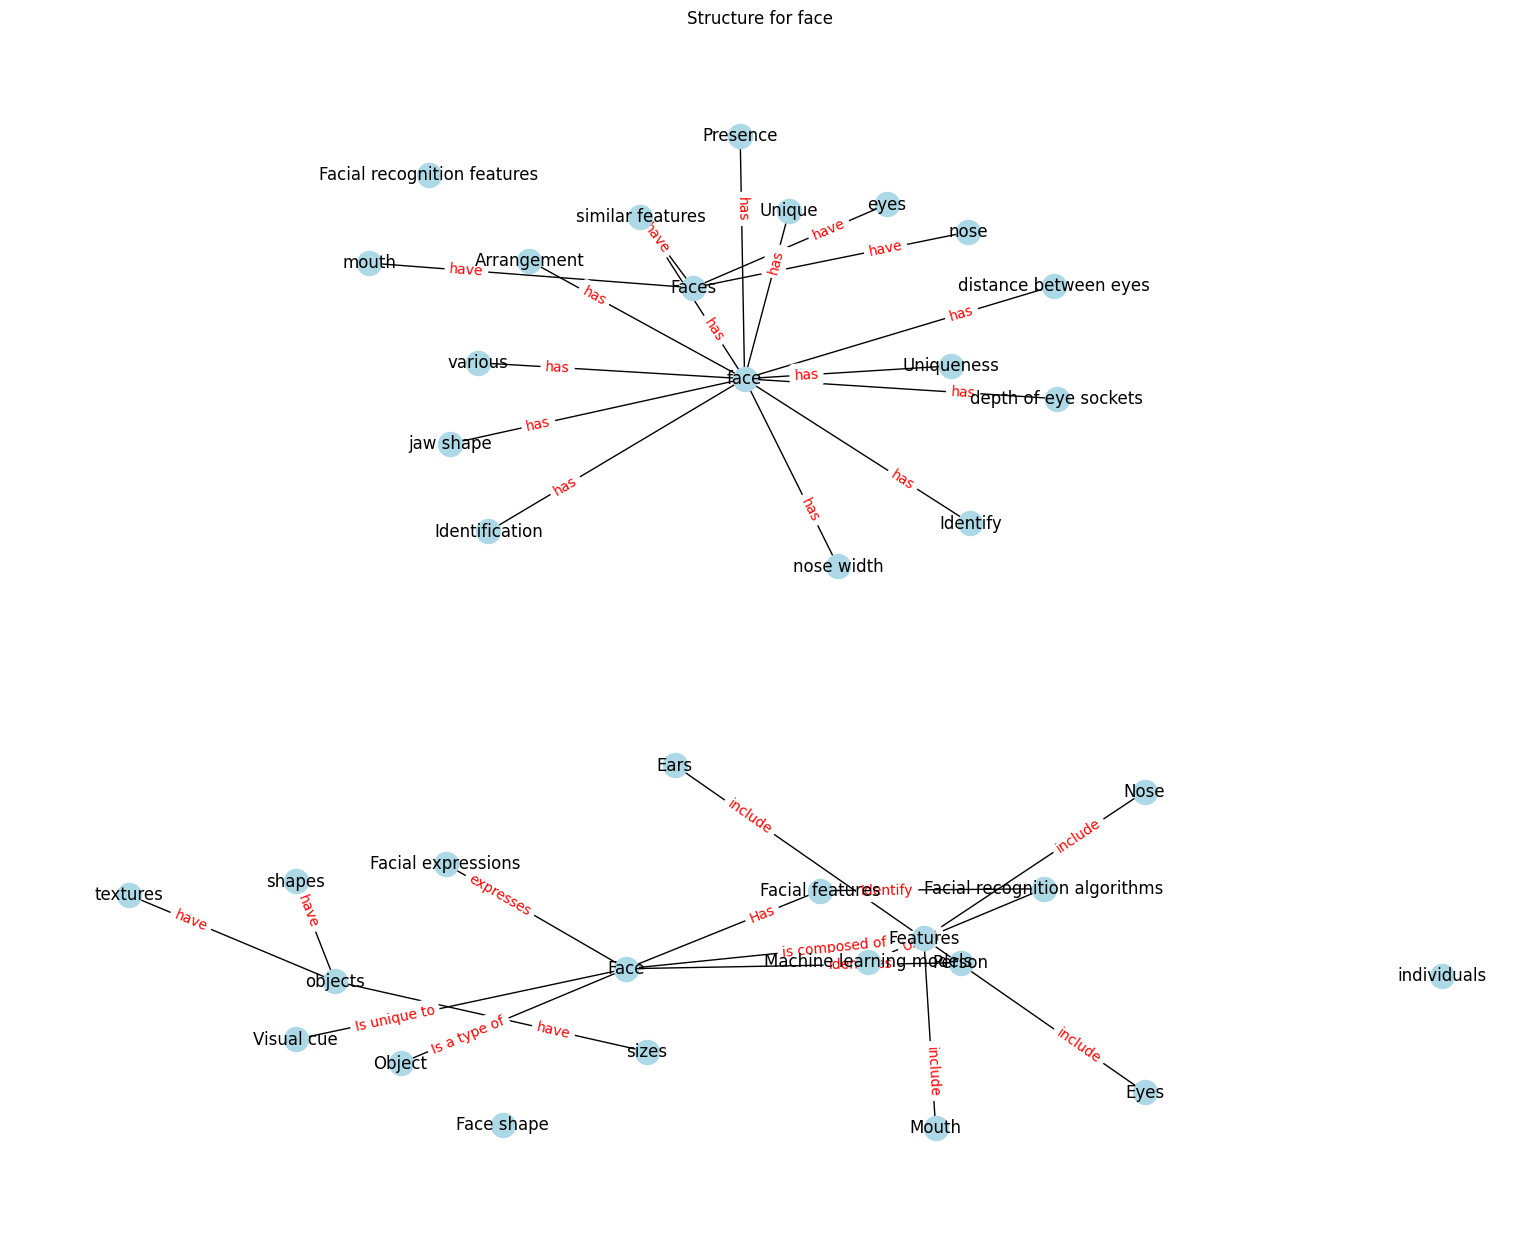

Description for face: ['A face is a unique arrangement of features that includes eyes, nose, mouth, ears and facial expressions that identifies a person.', 'Facial recognition features include distance between eyes, nose width, jaw shape, and depth of eye sockets. These are unique to individuals.', 'Facial recognition algorithms identify unique facial features, such as eyes, nose, mouth, and face shape, using machine learning models.', 'Faces have similar features such as eyes, nose, and mouth, while other objects can have various shapes, sizes, and textures.', 'The visual cue that is unique to face among all objects is the presence of facial features such as eyes, nose, and mouth.']


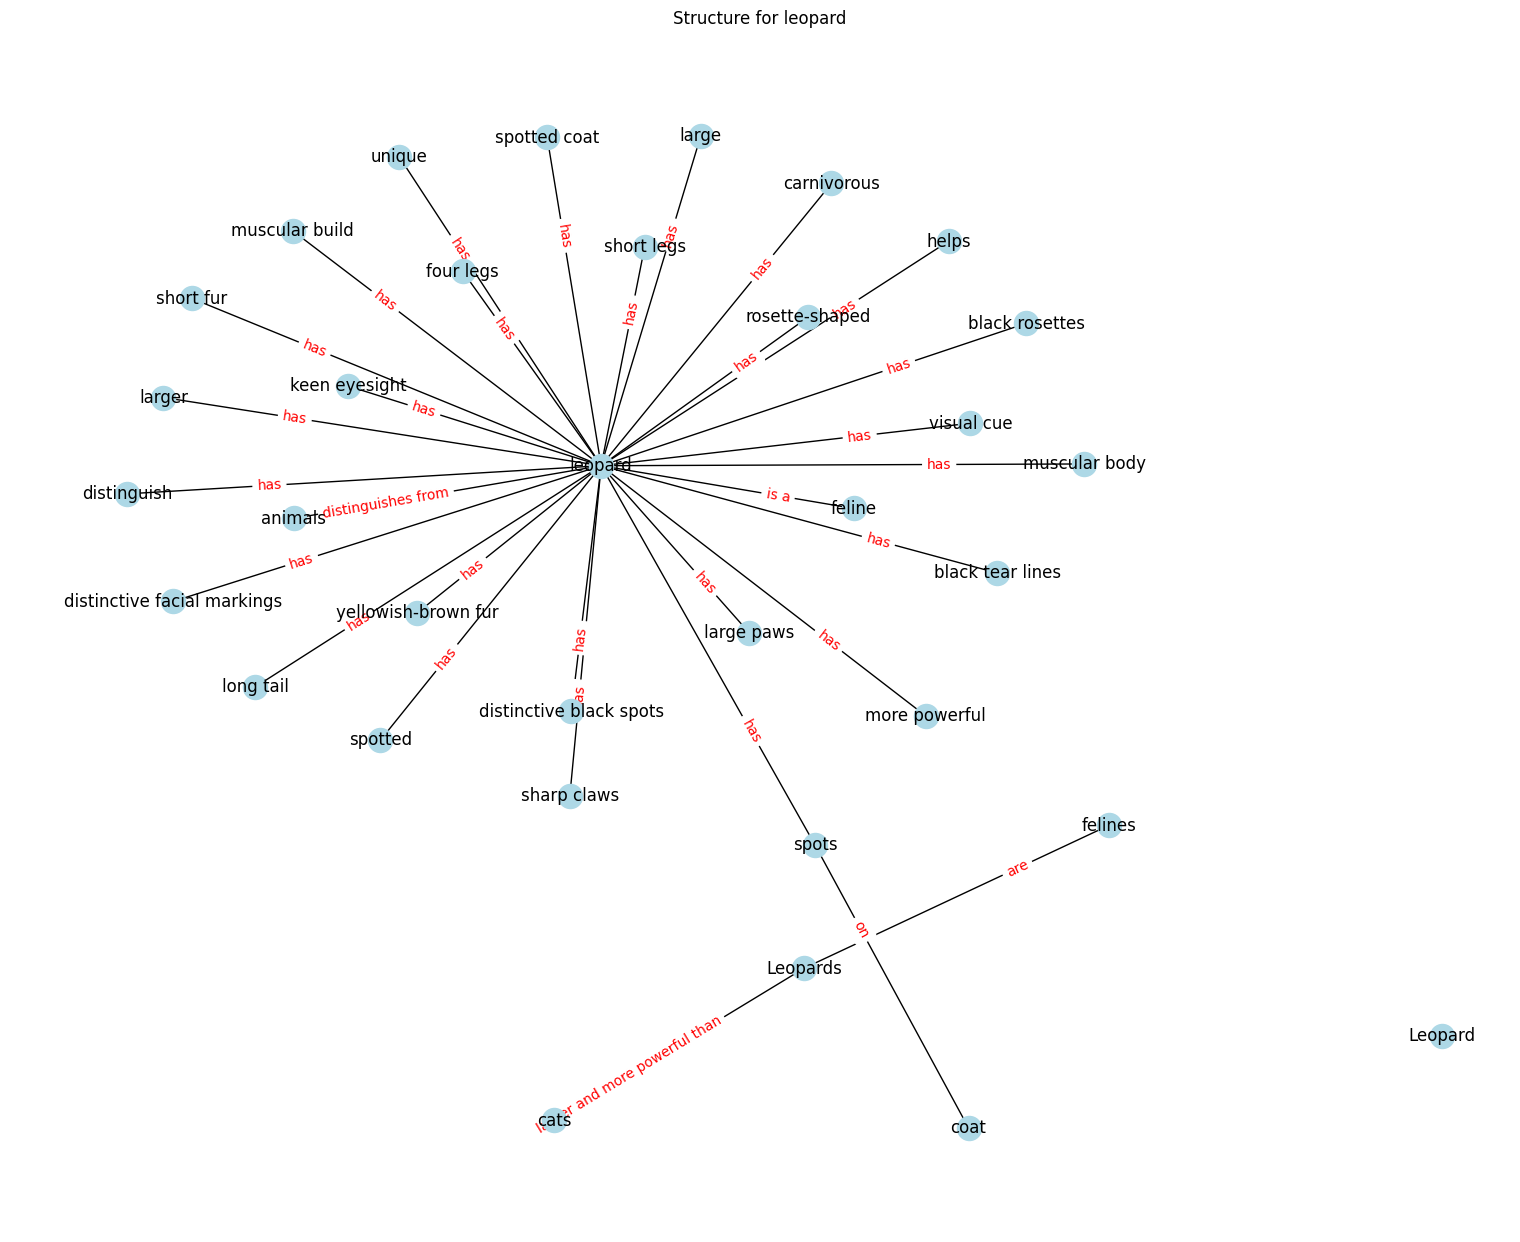

Description for leopard: ['A leopard is a carnivorous, spotted feline with a muscular body, four legs, short fur, sharp claws, and keen eyesight.', 'The distinct features of leopard are its spotted coat, muscular body, large paws, and distinctive facial markings including its black "tear" lines.', 'Leopards are large felines with yellowish-brown fur covered in black rosettes, a long tail, and short legs.', 'Leopards have distinctive black spots on their fur, a muscular build, and a long tail. They are larger and more powerful than most cats.', "The rosette-shaped spots on a leopard's coat are a unique visual cue that helps to distinguish them from other animals."]


In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import json

# 定义读取 JSON 文件的函数
def read_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

description_data = read_json('data/gpt_data/description/Caltech101.json')
structure_data = read_json('data/gpt_data/structure/Caltech101.json')

# 假设我们已经知道我们想要可视化的两个类别
categories_to_visualize = ['face', 'leopard']

# 可视化图
for category in categories_to_visualize:
    # 创建 NetworkX 图
    G = nx.Graph()

    # 添加实体节点
    for items in structure_data[category]:
        for item in items['Entities']:
            G.add_node(item)

    # 添加实体之间的边
    for items in structure_data[category]:
        for item in items['Entity-to-Entity Relationships']:
            G.add_edge(item['entity1'], item['entity2'], label=item['relationship'])

    # 添加属性节点和边
    for items in structure_data[category]:
        for item in items['Attributes']:
            G.add_node(item)
            G.add_edge(category, item, label='has')

    plt.figure(figsize=(15, 12))  # 调整图的大小
    # 为 spring_layout 函数添加参数 k 来调整节点之间的间距
    pos = nx.spring_layout(G, k=0.25, iterations=20)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=12)  # 调整字体大小
    # 添加边的标签，可选择性调整 label_pos 以改善显示
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', label_pos=0.3)
    plt.title(f"Structure for {category}")
    plt.show()

    # 打印描述
    description = description_data[category]
    print(f"Description for {category}: {description}")
